In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
ames = pd.read_csv('data/train.csv')
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames.shape

(1460, 81)

In [16]:
def uni_categ(feature):
    print("Missing Value Count: {}".format(feature.isnull().sum()))
    print("Distribution: \n{}".format(feature.value_counts()/feature.shape[0]))

def uni_num(feature, bins=50):
    print("Missing Value Count: {}".format(feature.isnull().sum()))
    feature.hist(bins=bins)

---

### Heating

In [6]:
uni_categ(ames['Heating'])

Missing Value Count: 0
Distribution: 
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64


### HeatingQC

In [7]:
uni_categ(ames['HeatingQC'])

Missing Value Count: 0
Distribution: 
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64


### CentralAir

In [8]:
uni_categ(ames['CentralAir'])

Missing Value Count: 0
Distribution: 
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64


### Electrical

In [9]:
uni_categ(ames['Electrical'])

Missing Value Count: 1
Distribution: 
SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64


### 1stFlrSF

Missing Value Count: 0


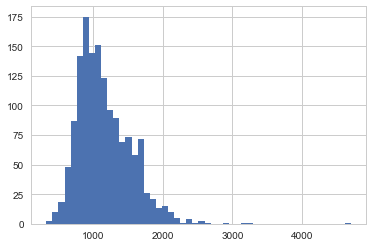

In [12]:
uni_num(ames['1stFlrSF'], bins = 50)

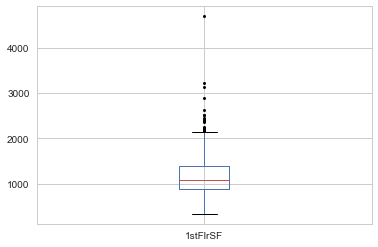

In [13]:
ames[['1stFlrSF']].boxplot(sym='k.')

### 2ndFlrSF

Missing Value Count: 0


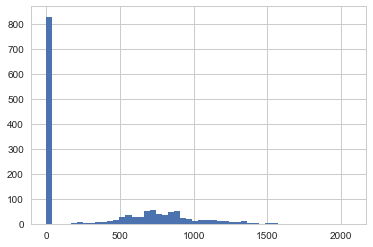

In [19]:
uni_num(ames['2ndFlrSF'])

In [21]:
(ames['2ndFlrSF']==0).sum()/1460

0.56780821917808222

more than half has value 0 for second floor area. means they don't have second floor. New categorical feature could be created, second floor present or not.

### LowQualFinSF

Missing Value Count: 0


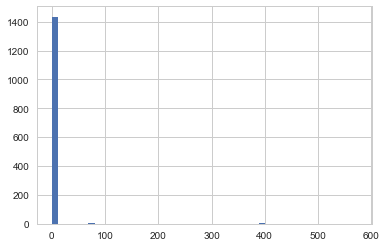

In [22]:
uni_num(ames['LowQualFinSF'])

In [25]:
ames['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

In [27]:
(ames['LowQualFinSF']==0).sum()/1460

0.98219178082191783

almost all values are 0. means only just few houses have some low quality finishing. Can be converted into categorical, if low quality finishing present or not.

### GrLivArea

Missing Value Count: 0


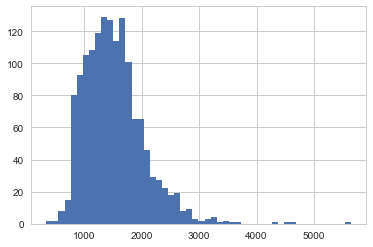

In [29]:
uni_num(ames['GrLivArea'])

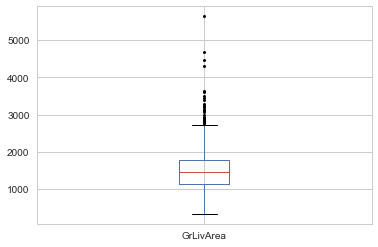

In [30]:
ames[['GrLivArea']].boxplot(sym='k.')

right skewed with some extreme outliers.

### BsmtFullBath

Missing Value Count: 0


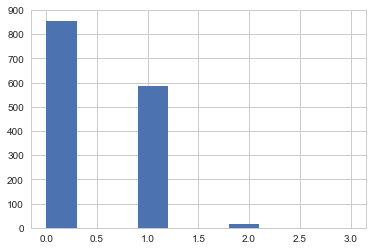

In [33]:
uni_num(ames['BsmtFullBath'], bins=10)

In [34]:
ames['BsmtFullBath'].unique()

array([1, 0, 2, 3])

it might be treated as ordinal.

### BsmtHalfBath

Missing Value Count: 0


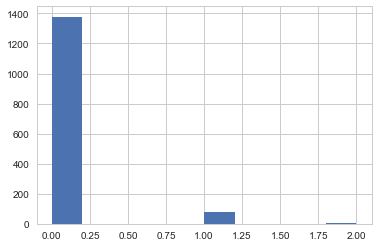

In [36]:
uni_num(ames['BsmtHalfBath'], bins=10)

In [37]:
ames['BsmtHalfBath'].unique()

array([0, 1, 2])

might be treated as ordinal.

### FullBath

Missing Value Count: 0


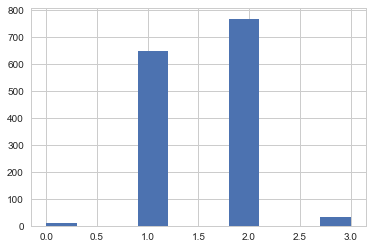

In [40]:
uni_num(ames['FullBath'], bins=10)

In [41]:
ames['FullBath'].unique()

array([2, 1, 3, 0])

ordinal.

### HalfBath

In [42]:
ames['HalfBath'].unique()

array([1, 0, 2])

Missing Value Count: 0


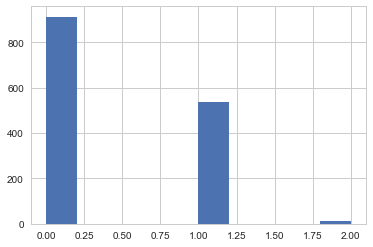

In [50]:
uni_num(ames['HalfBath'], bins=10)

ordinal

### BedroomAbvGr

In [45]:
ames['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

Missing Value Count: 0


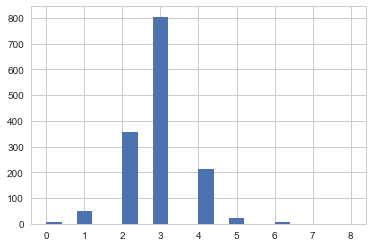

In [51]:
uni_num(ames['BedroomAbvGr'], bins=20)

### KitchenAbvGr

Missing Value Count: 0


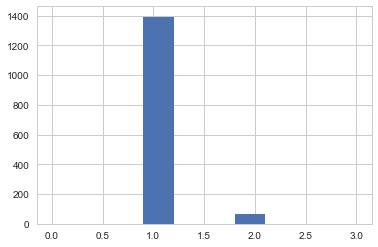

In [52]:
uni_num(ames['KitchenAbvGr'], bins=10)

In [53]:
ames['KitchenAbvGr'].unique()

array([1, 2, 3, 0])

### KitchenQual

In [54]:
uni_categ(ames['KitchenQual'])

Missing Value Count: 0
Distribution: 
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


### TotRmsAbvGrd

In [55]:
ames['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

Missing Value Count: 0


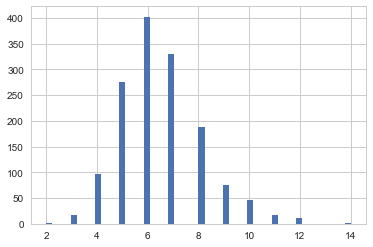

In [56]:
uni_num(ames['TotRmsAbvGrd'])

### Functional

In [57]:
uni_categ(ames['Functional'])

Missing Value Count: 0
Distribution: 
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64


extremely non uniform. might be converted into categorical: typical or compromised condition.

### Fireplaces

In [58]:
ames['Fireplaces'].unique()

array([0, 1, 2, 3])

In [59]:
uni_categ(ames['Fireplaces'])

Missing Value Count: 0
Distribution: 
0    0.472603
1    0.445205
2    0.078767
3    0.003425
Name: Fireplaces, dtype: float64


highly non-uniform. new categorical feature could be created: fireplace or not.

### FireplaceQu

In [60]:
uni_categ(ames['FireplaceQu'])

Missing Value Count: 690
Distribution: 
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64


missing values = fireplace not available - 'NoFireplace'